# 'Backend' to track particpants engagement

- a server running FastAPI gets results which can be queried as a dataframe
- especially during the session, instructors can refresh the adequate cells to see the latest results
  - at times, Colab won't allow too many concurrent sessions; the advice is to use VSC, etc. to query the server (in other words, if you present in Colab and want to get live participants answers, you risk Colab complaining about too many sessions on a non-pro plan, hence, use VSC etc. to query the server)

- for each run, please adjsut the day below so we have traceability across the runs

In [284]:
#@title Select the date you want to see answers for

# date = '2024-07-09'  #@param {type: "date"}
date = '2024-07-17'  #@param {type: "date"}

<a target="_blank" href="https://colab.research.google.com/github/UoA-eResearch/ResBaz24Python/blob/dev/plot_answers.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Import data from API

In [294]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(requests.get("http://resbaz.auckland-cer.cloud.edu.au/").json())
df

,timestamp,participant_name,question,answer,is_correct
0,2024-07-10 01:30:14.977322,Jens Brinkmann,0,10,True
1,2024-07-10 01:30:17.374943,Margaret Carpenter,0,10,True
2,2024-07-10 01:30:19.373644,Rebecca M,0,10,True
3,2024-07-10 01:30:20.718552,Kasey Kiesewetter,0,10,True
4,2024-07-10 01:30:20.820053,Rebecca M,0,10,True
...,...,...,...,...,...
177,2024-07-10 02:42:19.041430,Erin Steed,1500,Option B the Waiter and Tips,True
178,2024-07-10 02:42:19.711935,Jieyun Wu,1500,Option B the Waiter and Tips,True
179,2024-07-10 02:44:21.128235,Lin,1500,Option B the Waiter and Tips,True
180,2024-07-10 02:51:21.924277,Maira Fessardi,8,# @title Check Answer for Exercise 8\nimport r...,False


In [295]:
# export df as a csv file
df.to_csv(f"resbaz_{date}.csv", index=False)

In [306]:
# print rows in dataframe where question == 1499
df[df['question'] == 1499]

,timestamp,participant_name,question,answer,is_correct


# Poll #1 - Why you attend?

In [305]:
df_why_you_attend = df[df.question == 1499]
df_why_you_attend = df_why_you_attend[df_why_you_attend.is_correct].drop_duplicates(["participant_name", "question"])
for row in df_why_you_attend.itertuples():
  print(row.answer)

# Answers per question

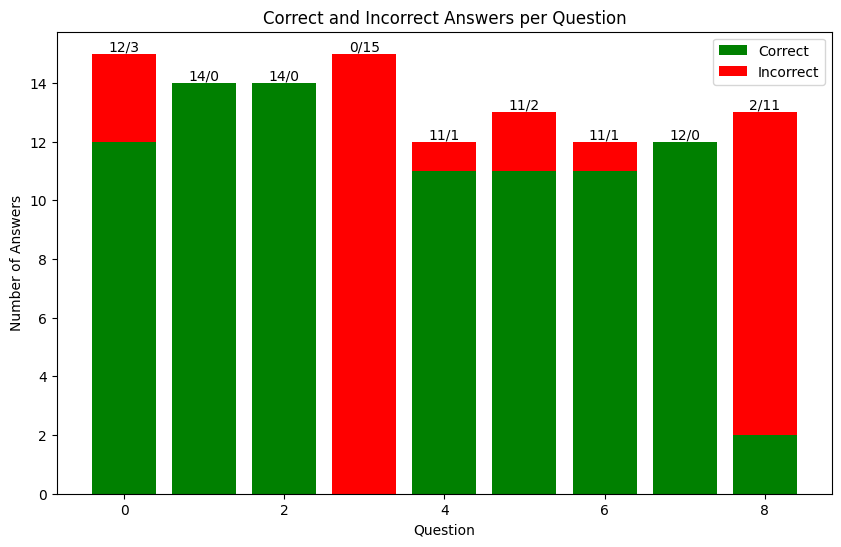

In [303]:
df = df.sort_values(["is_correct", "timestamp"], ascending=False).drop_duplicates(["participant_name", "question"])
# Group by question and count the total and correct answers
grouped = df.groupby('question').agg(total=('is_correct', 'size'), correct=('is_correct', 'sum')).reset_index()

# Calculate incorrect answers
grouped['incorrect'] = grouped['total'] - grouped['correct']

# Remove questions greater than 1000 as those are used for other purposes
grouped = grouped[grouped['question'] <= 1000]

# Calculate the total height for each bar (correct + incorrect)
total_height = grouped['correct'] + grouped['incorrect']

# Plot the stacked bar chart
plt.figure(figsize=(10, 6))
plt.bar(grouped['question'], grouped['correct'], color='green', label='Correct')
plt.bar(grouped['question'], grouped['incorrect'], bottom=grouped['correct'], color='red', label='Incorrect')

# Add labels outside each bar
for i, (c, ic, t) in enumerate(zip(grouped['correct'], grouped['incorrect'], total_height)):
    plt.text(grouped['question'][i], t, f"{c}/{ic}", ha='center', va='bottom')


plt.xlabel('Question')
plt.ylabel('Number of Answers')
plt.title('Correct and Incorrect Answers per Question')
plt.legend()

# download this plot as a png file
plt.savefig(f"resbaz_plot_per_question_{date}.png")
plt.show()



# Answers per participant

In [288]:
df_correct = df[df.is_correct].drop_duplicates(["participant_name", "question"])
# Remove questions greater than 1000 as those are used for other purposes
df_correct = df_correct[df_correct['question'] <= 1000]
df_correct

,timestamp,participant_name,question,answer,is_correct
170,2024-07-10 02:40:28.614404,victor,8,# @title Check Answer for Exercise 8\nimport r...,True
152,2024-07-10 02:33:43.252378,Elisa Tam,8,# @title Check Answer for Exercise 8\nimport r...,True
137,2024-07-10 02:14:48.999604,Maira Fessardi,7,"[""banana"", ""apple"", ""orange""]",True
131,2024-07-10 02:13:42.237532,Jenny Lee,5,string,True
130,2024-07-10 02:13:41.411228,Yimei Chuah,7,"[""banana"", ""apple"", ""orange""]",True
...,...,...,...,...,...
5,2024-07-10 01:30:21.951600,Isaac Bain,0,10,True
4,2024-07-10 01:30:20.820053,Rebecca M,0,10,True
3,2024-07-10 01:30:20.718552,Kasey Kiesewetter,0,10,True
1,2024-07-10 01:30:17.374943,Margaret Carpenter,0,10,True


<Axes: title={'center': 'correct answers per participant'}, xlabel='participant_name'>

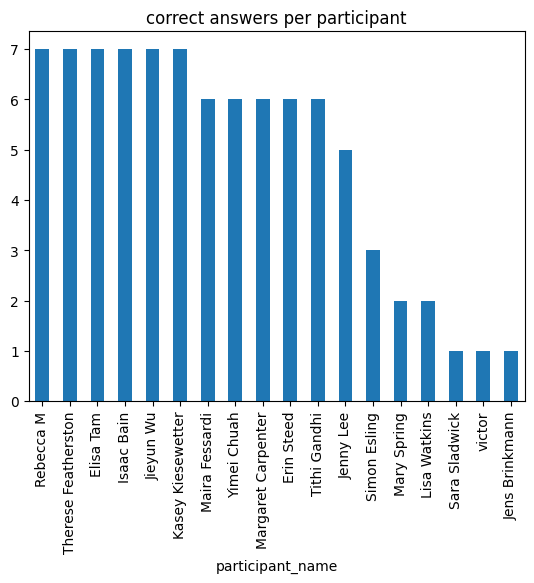

In [289]:
df_correct.participant_name.value_counts().plot.bar(title="correct answers per participant")

# Poll #2 - Which option do you choose?

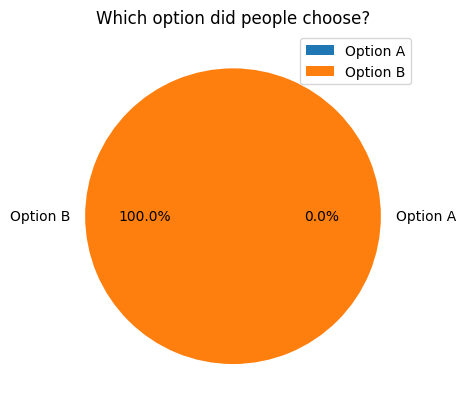

In [304]:
import matplotlib.pyplot as plt

# Get the data for question 1500
question_1500 = df[df.question == 1500]

# Count the number of participants who selected option a or b
option_a_count = question_1500[question_1500.answer == "Option A the Math Problem"].participant_name.nunique()
option_b_count = question_1500[question_1500.answer == "Option B the Waiter and Tips"].participant_name.nunique()

# Create the pizza plot
fig, ax = plt.subplots()
ax.pie([option_a_count, option_b_count], labels=["Option A", "Option B"], autopct="%1.1f%%")

# Add title and show the plot
ax.set_title("Which option did people choose?")

# add legend 
ax.legend()
plt.show()
